# Linear and Logistic Regression Analysis/Model
In this notebook we'll focus on few things:
* 1.1 Exploring and Understanding the data
* 1.2 Making the data ready for Machine Learning
* 1.3 Fitting Linear Regression without feature scaling or feature selections
* 1.4 Fitting Linear Regression with scaling and feature selections
* 1.5 Feature engineering - adding more data 
* 1.6 Implement ARIMA Model

### Analysis our data
Future steps, we need to get full analysis on this data, tables, graphs, etc.

## Exploring and Understanding the data
On this section we will focus on what the data is all about, how's the structure?, what kind of data are we looking at? what kind of questions we need to answer? and is features engineering acceptable on this data, Do we have enough data for this project?, etc.

First of, This dataset contains house sale prices for King County in Seattle state. It includes homes sold between May 2014 and May 2015.
The data has 19 features plus the [price feature] which is target feature and the id columns which also a index feature, along with 21613 observations or rows.

Starter questions could be, Does a house price in Seattle has relationship to performance of market? Does the median house price in Seattle compare to national better or worst? Does feature selection helps the prediction? 

Our next goal is to add more features.


In [519]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
path = "data/kc_house_data.csv"

In [363]:
# We'll create function that allows us to load data our in path, 
# Reason, because we can use the same function to load different dataset once
def load_data(path):
    # try to load the data
    try:
        data = pd.read_csv(path)
    except:
        # if there is issues, loading data
        print("unable to load the file")
    return data

In [364]:
# we are using this data now
ldata = load_data(path)
ldata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


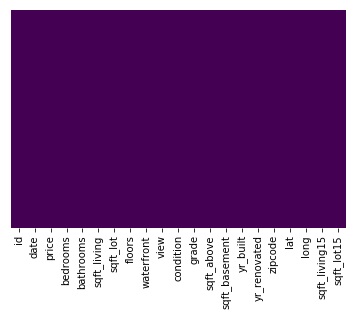

In [365]:
# this allow us to see if there is null values in our data
sns.heatmap(ldata.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
# it seems like there no NaN values in our data, nice!
# how does it look like if we have null values? I created sample data below...

In [366]:
# let' say we have null values in our data
# this is example data
example_data = pd.DataFrame()
# let's create two columns containing some data
example_data['First'] = [np.nan, 1.4, 4.3, np.nan, 1,7, np.nan, 1]
example_data['Second'] = [2, np.nan, 4.3, 3, 1,np.nan, 9, 1]

example_data

,First,Second
0,NaN,2.0
1,1.4,NaN
2,4.3,4.3
3,NaN,3.0
4,1.0,1.0
5,7.0,NaN
6,NaN,9.0
7,1.0,1.0


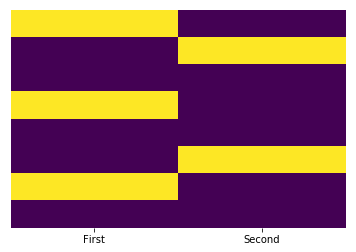

In [367]:
sns.heatmap(example_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [368]:
# now we going depth in our data....
# Now that we load our data, let's explore more. 
# I am interesting the date column, we'll go into this feature to see more insight

copy_data = ldata.copy()

# We can see that date column has both numeric and string 
# Our goal is convert this => 20141013T000000 to (2014-10-13) year-month-day
def clean_date(df):
    df['date'] = df['date'].str.split('T', expand=True)
    # show splitting of column
    return df['date']

clean_date(copy_data)

# now remove 'T' in date column, let's format more
# format our date
def format_date(df):
    df['date'] = df['date'].apply(lambda x:pd.datetime.strptime(x,'%Y%M%d'))
    return df

copy_data = format_date(copy_data)

In [369]:
copy_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-01-13 00:10:00,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-01-09 00:12:00,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-01-25 00:02:00,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-01-09 00:12:00,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-01-18 00:02:00,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [377]:
# let's get the days of the month 
# now we are doing some analysis
def day_of_month(dt):
    return dt.day

copy_data['DayOM'] = copy_data['date'].map(day_of_month)

In [378]:
# day of week,
def week_day(dt):
    return dt.weekday()

# we get the hour
def get_hour(dt):
    return dt.hour


In [379]:
# here we are creating new columns and assign to weekday, hour
copy_data['WeekDay'] = copy_data['date'].map(week_day)
copy_data['hour'] = copy_data['date'].map(get_hour)

In [380]:
copy_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Day-of-month,WeekDay,hour,DayOM
0,7129300520,2014-01-13 00:10:00,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,13,0,0,13
1,6414100192,2014-01-09 00:12:00,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,9,3,0,9
2,5631500400,2015-01-25 00:02:00,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,25,6,0,25
3,2487200875,2014-01-09 00:12:00,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,9,3,0,9
4,1954400510,2015-01-18 00:02:00,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,18,6,0,18


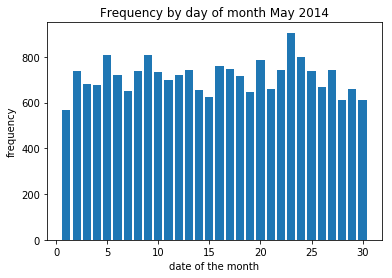

In [381]:
# let's plot the day of the month
plt.rcParams['axes.facecolor'] = 'white'
plt.hist(copy_data.DayOM, bins=30, rwidth=.8, range=(0.5, 30.5))
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency by day of month May 2014')
plt.show()

In [382]:
# let's count rows in Dayofmonth
def count_rows(rows):
    return len(rows)

by_date = copy_data.groupby('DayOM').apply(count_rows)
by_date.head()

DayOM
1    569
2    737
3    682
4    679
5    807
dtype: int64

In [383]:
# we can sort
sorted_date = by_date.sort_values()
sorted_date.head()

DayOM
31    251
1     569
30    611
28    612
15    623
dtype: int64

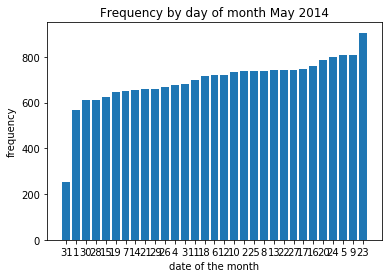

''

In [384]:
# we'll plot the sorted days
plt.bar(range(1, 32), sorted_date)
plt.xticks(range(1,32), sorted_date.index)
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency by day of month May 2014')
plt.show()
;

In [387]:
# this was what I was talking about getting sample codes in python
# if you use single question mark, it gives you doc string - meaning documentation about the fucinot..
# if you use double question mark, it gives you codes that used to create this function...

pd.datetime??

In [326]:
# Monday=0, 
# Tuesday=1
# so on...
#Sunday=6
copy_data.WeekDay.value_counts()

3    3439
4    3432
2    3284
1    2986
5    2982
6    2826
0    2664
Name: WeekDay, dtype: int64

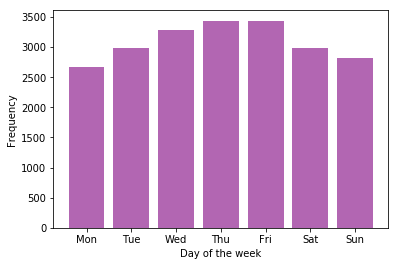

In [388]:
# Let's get most popular day of the week, here we are looking at 
plt.hist(copy_data.WeekDay, bins=7, range =(-.5,6.5), rwidth=.8, color='purple', alpha=.6)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.show()

In [389]:
# believe or not, we have add three features to our data. Let's see what they are
#ldata.columns
# Day of month 
# Day of week
# Hour

In [390]:
copy_data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Day-of-month,WeekDay,hour,DayOM
0,7129300520,2014-01-13 00:10:00,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,13,0,0,13
1,6414100192,2014-01-09 00:12:00,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,9,3,0,9
2,5631500400,2015-01-25 00:02:00,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,25,6,0,25


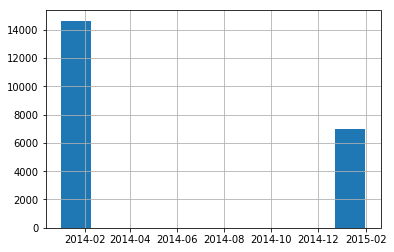

In [391]:
copy_data['date'].hist(bins=10)
plt.show()
# interesting, there more houses sold in 2014 than 2015

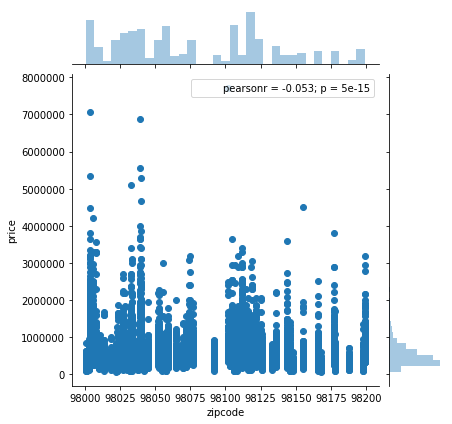

In [392]:
# let's create jointplot showing price and zipcode
sns.jointplot(x = 'zipcode', y = 'price', data = copy_data)
plt.show()
# it seems like some zipcode, some people are rich live there...

In [393]:
# we can do more analysis later...

## Making the data ready for Machine Learning
To use any data for machine learning, it needs to be numeric. On this section, we'll cover on:
* 1.2.1 converting categorical features into numeric, 
* 1.2.2 imputing missing values 
* 1.2.3 removing unnecessary features
* 1.2.4 we'll use cross-validation to split our data into train and test sets
* 1.2.5 etc. 

### working with categorical features: 
Although there isn't any categorical feature in our data, but its good practice to know how to take care of categorical data in your data. In this section we'll create data from scratch that has categorical values.

In [396]:
gender = pd.DataFrame()
gender['Gender'] = ['male', 'female', 'female', 'male', 'female']
gender

,Gender
0,male
1,female
2,female
3,male
4,female


In [400]:
# we can create one hot encoder for this column meaning that converting 0's and 1's 
pd.get_dummies(gender["Gender"], drop_first=True)
# we can delete_first column as parameter here...a

,male
0,1
1,0
2,0
3,1
4,0


In [ ]:
# I see, so we are saving us some energy and only keep 1 column
# give me 5 minutes bro its maghrib time here, will be back shortly
# insha'allah

In [398]:
# did you see the problem here, if we use this in our model....
# From what I understand, the computer can only interpret numbers
# and that is why we converted to dummies 0 or 1, and in this way
# we can include categories into our models?
# yes, but the computer can easily guess, becuase female has 0 and male has 1,
# next row, if femal has 1 and male has to have 0, so on...
# there is way to make computer hard to guess....understood bro, thanks for explaining

In [394]:
# Let's imagine we have this data
# this is sample data
cat_data = {'Name': ['Abdi', 'Mohamed', 'Saleban', 'Guled', 'Log'], 
        'last_name': ['Jabar', 'Ahmed', 'Olow', 'Elmi', 'Ri'], 
        'Random': [42, 52, 21, 26, 73], 
        'city': ['Middlebury', 'London', 'Burlington', 'Hargesa', 'DC']}
df = pd.DataFrame(cat_data, columns = ['Name', 'last_name', 'Random', 'city'])
df

,Name,last_name,Random,city
0,Abdi,Jabar,42,Middlebury
1,Mohamed,Ahmed,52,London
2,Saleban,Olow,21,Burlington
3,Guled,Elmi,26,Hargesa
4,Log,Ri,73,DC


In [395]:
df_copy = df.copy()
# We can use pandas to create dummy variables for every unique category in df.city
pd.get_dummies(df["city"])

,Burlington,DC,Hargesa,London,Middlebury
0,0,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [401]:
# or use sklearn preprocessing library
# this is same thing, instead using pandas dummy, we can use sklearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Convert strings categorical names to integers
integerized_data = LabelEncoder().fit_transform(df["city"])
# Convert integer categorical representations to OneHot encodings
OneHotEncoder().fit_transform(integerized_data.reshape(-1,1)).toarray()

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [402]:
# example 2 - imputing missing values - taking care of missing data
df_missing = pd.DataFrame()
df_missing['first'] = [0, 1.4, 4.3, np.nan, 1,7, np.nan, 1]
df_missing

,first
0,0.0
1,1.4
2,4.3
3,NaN
4,1.0
5,7.0
6,NaN
7,1.0


In [406]:
# we can use imputer fucntion in sklearn
from sklearn.preprocessing import Imputer
mean_imputer = Imputer(missing_values='NaN', strategy='median', axis=0)
# Train the imputor on the df dataset
mean_imputer = mean_imputer.fit(df_missing)

In [407]:
# Apply the imputer to the df dataset
imputed_df = mean_imputer.transform(df_missing.values)
# View the data
imputed_df

array([[ 0. ],
       [ 1.4],
       [ 4.3],
       [ 1.2],
       [ 1. ],
       [ 7. ],
       [ 1.2],
       [ 1. ]])

### Make our data for machine learning
I have just introduced to you how to take care of categorical and missing data in your data. Now We'll make our data ready for machine learning. 

In [408]:
# let's get our data into X and y. X containing all features except 'price' column and y containing price column
# here we are using the original data, instead copy_data
# if date equals 2014 assign 1 and everyelse 0
format_date = [1 if x == 2014 else 0 for x in ldata.date]
#format_year_build = [1 if x >= 2000 else 0 for x in ldata.yr_built]
#ldata['yr_built'] = format_year_build
ldata['date'] = format_date
# we are droping price, id ,date in our training data
X = ldata.drop(['price', 'id', 'date'], axis=1)
# assign price column in our target output
y = ldata['price']
# i mean alot of 0 in our data
# we have 0 values in our X data, I don't know if that supposed to be 'NaN' for all zeros or just 0. 
# if we need to convert all 0's to 'NaN' and impute missing values, we can do that:
# X[X==0] = np.nan | that will take care of all zeros and convert to NaN values

In [411]:
X.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [459]:
# let's split our data into train and test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .25, 
                                                    random_state = 42)

# X Train/Test shape
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print()
# y train/test shape
print("y train shape: ", y_train.shape)
print("y test shape: ", y_test.shape)

X train shape:  (16209, 18)
X test shape:  (5404, 18)

y train shape:  (16209,)
y test shape:  (5404,)


In [461]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5945,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
8423,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
13488,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
20731,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
2358,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [462]:
#X_train.yr_built.value_counts()

In [463]:
ldata.date.value_counts()

0    21613
Name: date, dtype: int64

## Fitting Linear Regression without feature scaling or feature selections - 70% accuracy
In this section we'll cover on applying our "ready data" into either logistic or linear regression without scaling or selecting important features. This will allow as to compare our performancy score.

One reason, we are not using logistic regression is that it accepts binary output. Here we have continues output, we can use logistic regression if our target column is 'date' because we convert zeros and ones, zeros being houses build after 2014 and one being houses build before 2014.

In [464]:
# let's fit our data linear regression without scaling and adding more data
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [465]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5945,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
8423,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
13488,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
20731,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
2358,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [494]:
selected_features = X_train[['sqft_above', 
                             'sqft_living', 
                             'grade', 
                             'bathrooms',
                             'sqft_living15']]
#selected_features

In [495]:
# sorry to interject bro, I think with the np array you can use my_array[row,column]
# in this case it would be X_train[:, ['sqft_above', 'sqft_living']]

In [496]:
# Note: It will take time to run first,
linermodel = LinearRegression()
# once we called our linear regression class, we need to fit our data...
linermodel.fit(selected_features, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [497]:
test_selected = X_test[['sqft_above', 
                        'sqft_living',
                        'grade', 
                        'bathrooms',
                        'sqft_living15']]

In [ ]:
# I think I know what the problem is , for the score, they have to be numpy arrays
# with the feature and target variable both of same shape...
# about 50% percent just using two featues, that's great becuase if 
# subtract 70 - 50 that is like only two have about 50 %
# two have double the explanatory power than all the other features...yes

In [498]:
# getting there... 
linermodel.score(test_selected, y_test)

0.55050560354254907

In [417]:
# Most used model in machine learning gbm called gradientBoostingMachine,
# it has regreesion and classifcation task
# let's use Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# there few parameter tuning we need to do, if we need to computer choose for 
# us we can use gridsearch and pipeline 
# its useful model, all you need to do is defined some params for each model you are using.. and use gridsearch to find best parameters...


In [421]:
GradientBoostingRegressor?

In [422]:
gbr_model = GradientBoostingRegressor(n_estimators= 600, 
                                      max_depth = 4, 
                                      min_samples_split = 2, 
                                      learning_rate = 0.1, 
                                      loss = 'lad')
# we change this parameters...

In [423]:
# fit our data
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [424]:
# nice! we got score of 88 percent - let's change some parameters..
# gridsearch would work best on this case.... instead doing manually
gbr_model.score(X_test, y_test)

0.86922853275241274

### Standardize Features

In [425]:
# scaling our data, using standardScalr, there are many algorthm out there we can use.
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
;

''

In [426]:
# fitting our data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [429]:
# it looks its scaled
X_train

array([[ 0.67740215,  0.17896268, -0.2902756 , ...,  0.19275876,
        -0.47391081, -0.12979094],
       [-0.3941321 ,  0.50566682, -0.52181284, ...,  0.19275876,
        -0.38591932, -0.33901903],
       [ 0.67740215,  0.50566682, -0.38950585, ..., -0.70666908,
        -0.1659406 , -0.19606816],
       ..., 
       [-0.3941321 ,  0.50566682,  0.05151748, ...,  1.29919776,
        -0.42991507, -0.37447827],
       [-2.53720059, -1.78126215, -1.86693398, ..., -0.77805224,
        -1.19250798,  0.0840784 ],
       [ 0.67740215,  0.50566682,  1.16510137, ...,  0.82093058,
         1.52056295, -0.25020384]])

In [430]:
# Note: It will take time to run first, with scaled data
lmode = LinearRegression()
lmode.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [439]:
y_pred = lmode.predict(X_test)
lmode.score(X_test, y_test)

# I don't think it makes better... it gained little.. not even one half...


0.70483562939690447

In [ ]:
# we can test with gbr

In [440]:
# fit our data
scaled_gbr = GradientBoostingRegressor(n_estimators= 600, 
                                      max_depth = 4, 
                                      min_samples_split = 2, 
                                      learning_rate = 0.1, 
                                      loss = 'lad')

In [441]:
scaled_gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [442]:
# so the take home here, some data is better to use scaled, other not...
scaled_gbr.score(X_test, y_test)

0.86885038819147331

In [445]:
ldata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

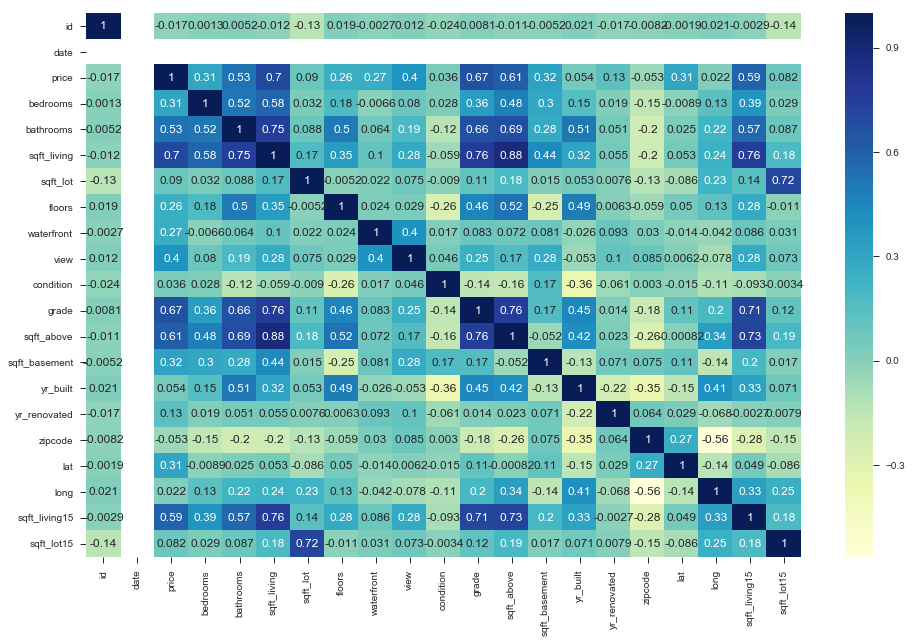

In [450]:
# this is a correlation matrix, do you find it not useful?

from string import ascii_letters
sns.set(rc={"figure.figsize": (16, 10)})

sns.set_style("ticks", {"xtick.major.size": 6, "ytick.major.size": 6})


correlation = ldata.corr()
sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.show()

# maybe you can replace df with our current dataframe including the features
# we have right now, after you done all the cleaning and transforming at beginning

In [503]:
# let's find feature importances
from sklearn.ensemble import RandomForestRegressor
# my one of my favariate model RFR

feature_n = X_train.columns

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [504]:
print("Features sorted by their score: ")
print(sorted(zip(map(lambda x: round(x, 3), rf.feature_importances_), feature_n),  reverse=True))
# this says that sqft_above is not that important.
# but why is price in there, oohh I see, because we took the whole ldata without excluding price.
# would the scores change if we exclude our target variable?
# you are right, always don't get target outputs to the machine....
# now, makes sense, amazing, I am learning so much :)
# but question is, what if features are similar in their meaning? Does it make sense to include them?
# for example, grade, it measures quality of the house, what if its value is determined by PCA
# principle component analysis and its value comes from sqft_living, waterfront and other features...
# here is the burning question, should some features be mutually exclusive?
# like for example you have 2 features that both measure income-household wealth
# would it make sense to include both in our model, or better to select the one that has higher score and leave other?
# Good question, if we have similar features measuing similar observations, then its better to take or find interactive 
# between the two features and use that in your model. Absolutely, that's called nested model
# when some features explain each other and then you need to model this relationship and somehow
# correct for it in the main model... nice, yeah.
# give a sec, sure no problem.
# what task should we cover next, pca or arima?
# I think pca, because we have little domain knowledge with this dataset,
# we need to dig deeper into the feature relationships to arrive at final selection of features that give best score.
# What do you think? I was thinking the same thing..

Features sorted by their score: 
[(0.33200000000000002, 'grade'), (0.251, 'sqft_living'), (0.14899999999999999, 'lat'), (0.064000000000000001, 'long'), (0.041000000000000002, 'yr_built'), (0.032000000000000001, 'sqft_living15'), (0.031, 'waterfront'), (0.024, 'sqft_above'), (0.014999999999999999, 'zipcode'), (0.014999999999999999, 'sqft_lot15'), (0.014, 'sqft_lot'), (0.0089999999999999993, 'view'), (0.0070000000000000001, 'bathrooms'), (0.0050000000000000001, 'sqft_basement'), (0.0030000000000000001, 'yr_renovated'), (0.0030000000000000001, 'floors'), (0.0030000000000000001, 'condition'), (0.0030000000000000001, 'bedrooms')]


### Applying PCA to the data for visualization

In [528]:
from sklearn.decomposition import PCA
# let's stick with 2-d, it will produce two features that explains everything in our data
pca = PCA(n_components=2)
# fit pca model to our data
# it might be useful to scale our data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [529]:
# now transform data into first two principal components
X_pca = pca.transform(X_train)
print("Original Shape: {}".format(str(X_train.shape)))
print("Reduced Shape: {}".format(str(X_pca.shape)))

Original Shape: (16209, 18)
Reduced Shape: (16209, 2)


In [530]:
# so this means we have 2 columns, i.e., the two principal components that explain most of our datapoints? yes..


In [531]:
plt.style.use('seaborn')

In [532]:
X_pca[:, 0]

array([ -6845.7478407 , -15239.8325374 ,  -8250.62194607, ...,
       -13975.36097606,    995.43593847, -11252.44350935])

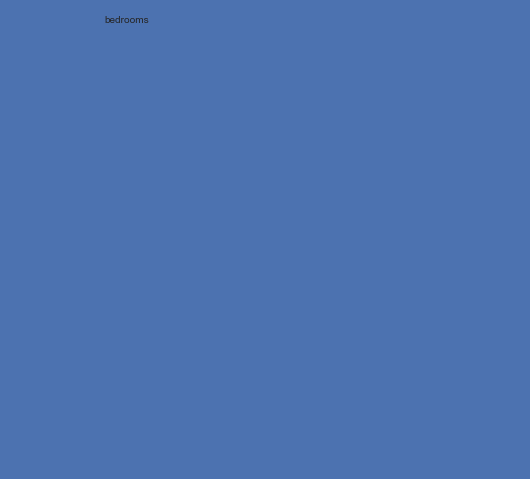

';'

In [533]:
# let's plot our pca
# I don't why its not showing..
# no problem bro, let's continue this session tomorrow inshaAllah
# what is your availability?
# I usualy have study time early morning around 7am to 12pm, I'll be availeble on that time...

# I think in your time zone, will be around 4pm, yes bro, I am back from work around 7-8pm
# no problem, I 
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], y)
plt.legend(feature_n, loc="best")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()
;;

In [ ]:
# bro use this style please
# plt.style.use('ggplot'). sorry to interject, yes plt. s

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [447]:
#from sklearn import datasets
# simple feature selection method is use RFE,
# it just tells you a boolean way if some features is important to use
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
almode = LinearRegression()
rfe = RFE(almode, 21)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)
# it telling us, all of our features is good to use...

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#Logistic Regression Model Fitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)

#y_pred = logreg.predict(X_test)
#print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

### Confusion Matrix

In [284]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)

## Fitting Logistic Regression with scaling and feature selections
Again, we'll the process on above, this time applying feature scaling and only using important features

##  Feature engineering - adding more data
In this section we'll focus on adding more data into our existing dataset, this requires domain knowledge or we could use polynomial feature selection to for us.

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

## Implement ARIMA Model
We'll implement arima model for time-series predictions.

In [160]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = "data/kc_house_data.csv"

In [163]:
# little handy function that loads our data
def load_data(path):
    df = pd.read_csv(path)
    return df

In [246]:
df = load_data(path)
#df

In [165]:
type(df.date)

pandas.core.series.Series

In [168]:
# format our date
def format_date(df):
    df['date'] = df['date'].apply(lambda x:pd.datetime.strptime(x,'%Y%M%d'))
    return df.head()

In [247]:
format_date(df)
#df.date

ValueError: unconverted data remains: T000000

In [124]:
#df

In [125]:
# more exploring... 
#print(df['bedrooms'].value_counts(dropna=False))
#print(df['waterfront'].value_counts(dropna=False))
#print(df['view'].value_counts(dropna=False))
#print(df['condition'].value_counts(dropna=False))
#print(df['grade'].value_counts(dropna=False))

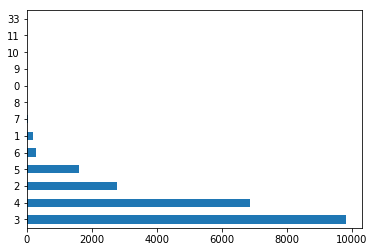

In [170]:
# count each
df['bedrooms'].value_counts().plot(kind='barh')
plt.show()

In [171]:
print(df.lat.max())
print(df.lat.min())

47.7776
47.1559


In [172]:
#!pip install mpl_toolkits

In [180]:
locations = df[['lat', 'long']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[47.4095, -122.315]

In [153]:
type(locationlist)

list

In [174]:
len(df)

21613

In [176]:
#df

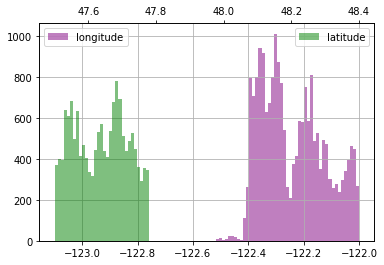

''

In [200]:
# plot location
plt.hist(df['long'], bins=100, range = (-123.1, -122.0), color='purple', alpha=.5, label = 'longitude')
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(df['lat'], bins=100, range = (47.5, 48.4), color='g', alpha=.5, label = 'latitude')
plt.legend(loc='best')
plt.show()
;

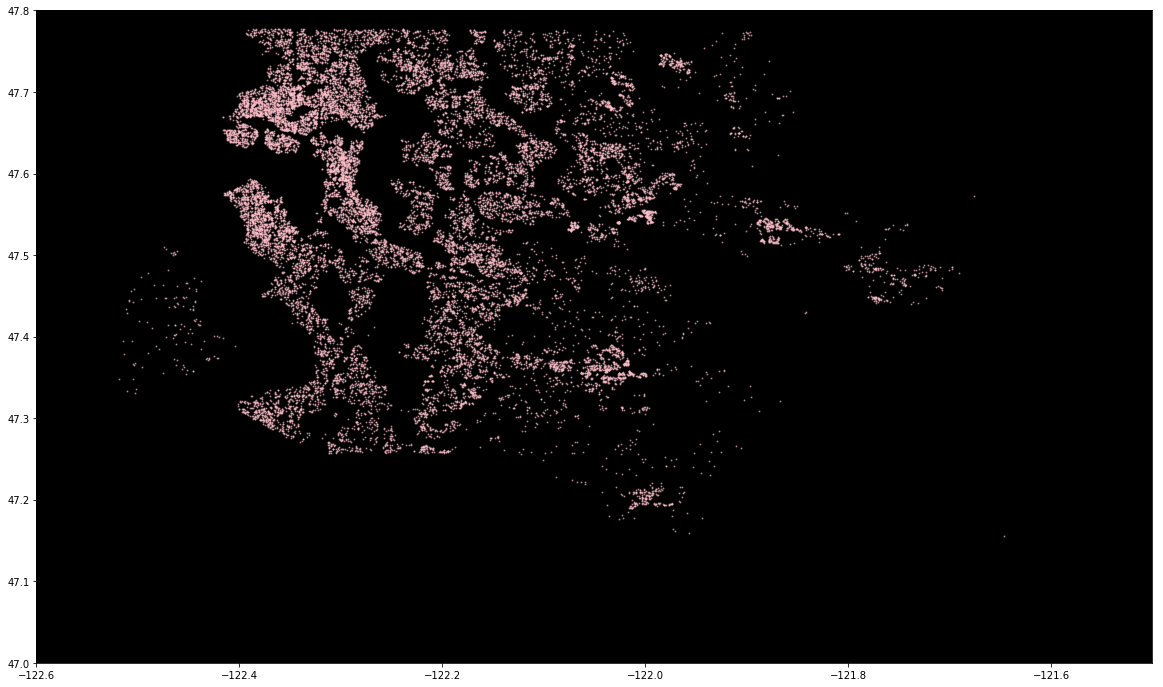

In [245]:
plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize=(20, 12))
plt.plot(df['long'], df['lat'], '.', ms=2, alpha=.5, color='pink')
plt.xlim(-122.6, -121.5)
plt.ylim(47.0, 47.8)
plt.show()

In [4]:
# turning date column into datetimeIndex

# Prepare a format string: time_format
time_format = '%Y-%m-%d'

df['date'] = pd.to_datetime(df['date'], format=time_format)  


In [5]:
# checking column types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
date2            21613 non-null object
dtypes: datetime64[ns](1), float64(

In [10]:
# do some value counts to see the range of values for categorical variables (bedrooms, waterfront, view, condition, grade)
# how are the categorical variables distributed, EDA!



7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


In [11]:
# following are categorical variables (bedrooms, waterfront, view, condition, grade) and need to transformed

df['bedrooms'] = df['bedrooms'].astype('category') 
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')



In [ ]:
# computing the covariance matrix and heatmap of the dataframe
# left one enlargens horizontal axis and right one vertical

from string import ascii_letters
sns.set(rc={"figure.figsize": (18, 12)})

sns.set_style("ticks", {"xtick.major.size": 6, "ytick.major.size": 6})


correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
# ----------------Finding correlation 

# Correlation is a statistical measure that suggests the level of linear dependence between two variables
# that occur in pair. 
# Its value is between -1 to +1
# Above 0 is positive correlation i.e. X is directly proportional to Y.
# Below 0 is negative correlation i.e. X is inversly proportional to Y.
# A value close to 0 suggests weak relation.

# Picking up some of the features that are highly correlated with price
# Correlation between price and sqft_living is (0.7)
# Correlation between price and grade is (0.67)
# Correlation between price and sqft_above is (0.61)
# Correlation between price and sqft_living15 is (0.59)
# Correlation between price and bathrooms is (0.53)

# Now, let us evaluate the correlation of the below features with each others for multicolinearity.
# We would do this later by calculating VIF
# Correlation between sqft_living and sqft_above is (0.88)
# Correlation between sqft_living and sqft_living15 is (0.76)
# Correlation between sqft_living and grade is (0.76)
# Correlation between sqft living and bathrooms is (0.75)
# We would keep grade as of now as it is a category.

# Following have weak relation with price and we would remove them.
# date, sqft_lot, yr_built, long, sqft_lot15
# We would delete lat as well even though it has correlation of 0.31
# because, 0.31 is not that significant. It is a category.
# If we would convert it to factor, there would be way too many levels 
# and would make computation very expensive.

# Another reason to remove variable is to avoid overfitting.

In [ ]:
# Simple Linear Regression of key candidates on house prices

# Plot a linear regression between 'price' and 'sqft_living'
sns.lmplot(x='sqft_living', y='price', data=df)

# add the labels as strings
title = 'King County House Prices'
xlab = 'Sqft Living Area'
ylab = 'House Price in $'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)

plt.show()


In [ ]:
# change graphic by making the scales more neat, e.g., sqft_living moving up in 1 thousand increments and removing 0's from price

# definition of tick_val and tick_lab

# new plot with ticks

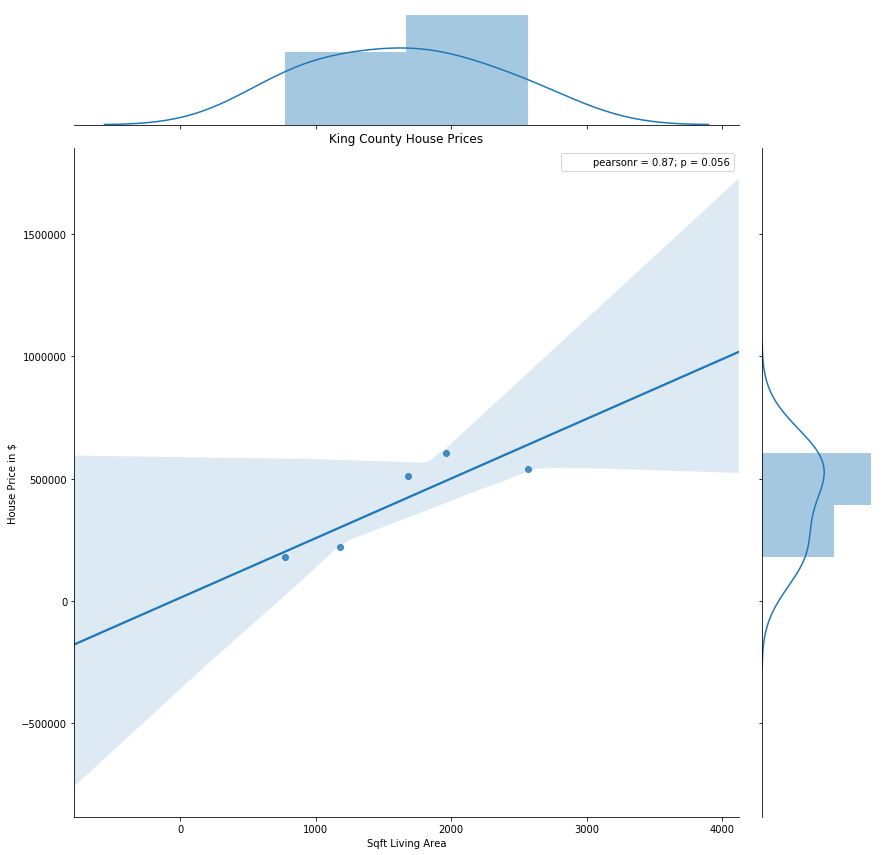

In [64]:
# Using jointplot()

sns.jointplot(x='sqft_living', y='price', data=df, size=12, kind="reg")
# add the labels as strings
title = 'King County House Prices'
xlab = 'Sqft Living Area'
ylab = 'House Price in $'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()



In [ ]:
# from the heatmap, which variables are potential features we need to include?

# bedrooms, bathrooms, sqft_living, grade, view, waterfront, latitude